# <font color='green'>Homework 2</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2023<br>
Course: Machine Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 810100377
</div>

***

# <span style="color:purple">Importing Required Packages and Classes</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

# <span style="color:purple">Question 6</span>

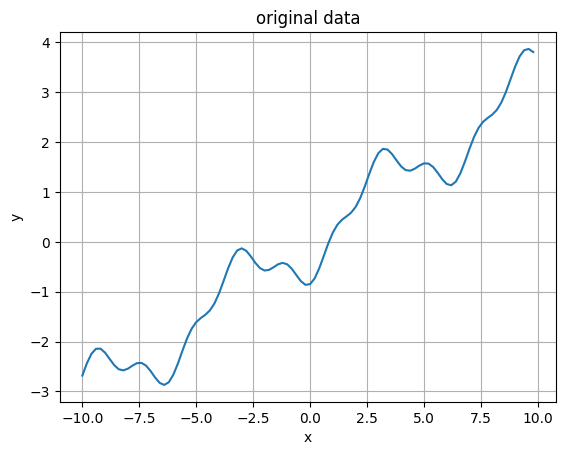

In [106]:
x = np.arange(-10,10,0.2)
y = 2*np.cos(x)/((-1)*np.pi) + (2*x)/(2*np.pi)+2*np.cos(3*x)/(-3*np.pi)

plt.title('original data')
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [98]:
mean = 0 
std = 1
num_of_samples = len(x)
white_noise = np.random.normal(mean, std, size=num_of_samples)

lambda_ = 2
poisson_noise = np.random.poisson(lambda_, size=num_of_samples)

coeff = 0.1
y_w = y + coeff*white_noise
y_p = y + coeff*poisson_noise

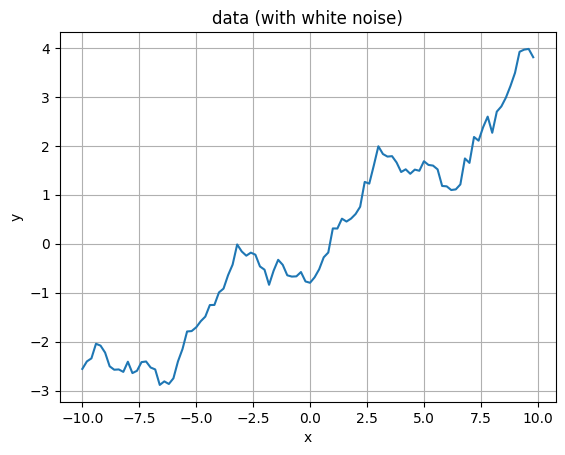

In [99]:
plt.title('data (with white noise)')
plt.plot(x, y_w)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

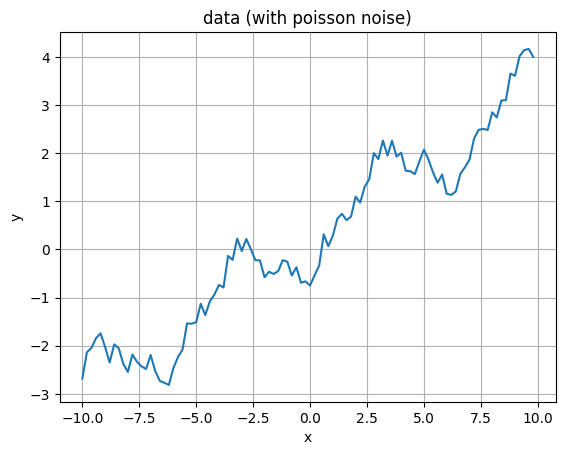

In [100]:
plt.title('data (with poisson noise)')
plt.plot(x, y_p)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [101]:
import sklearn.metrics

raw_data = {'x': x,
            'y_w': y_w,
            'y_p': y_p,
            'y': y,
           }
df = pd.DataFrame(raw_data, columns=['x', 'y_w', 'y_p', 'y'])

mask = np.random.rand(len(df)) < 0.7

train_x = (df['x'])[mask]
train_y_w = (df['y_w'])[mask]
train_y_p = (df['y_p'])[mask]

test_x = (df['x'])[~mask]
test_y = (df['y'])[~mask]


MSE_w = []
MSE_p = []
_w_ = []
_p_ = []
for i in range(1, 16):
    z_w = np.polyfit(train_x, train_y_w, i)
    z_p = np.polyfit(train_x, train_y_p, i)
    p_w = np.poly1d(z_w)
    p_p = np.poly1d(z_p)
    predicted_w = p_w(test_x)
    predicted_p = p_p(test_x)
    _w_.append(p_w)
    _p_.append(p_p)
    mse_ = sklearn.metrics.mean_squared_error(test_y, predicted_w)
    MSE_w.append(mse_)
    mse_ = sklearn.metrics.mean_squared_error(test_y, predicted_p)
    MSE_p.append(mse_)

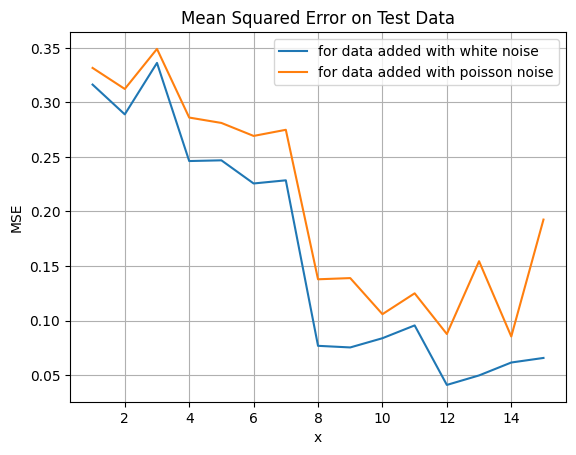

In [102]:
x = range(1, 16)
plt.title('Mean Squared Error on Test Data')
plt.plot(x, MSE_w, label='for data added with white noise')
plt.plot(x, MSE_p, label='for data added with poisson noise')
plt.xlabel('x')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

In [103]:
print('MSE.argmin for fitted curve to data added with white noise: ', np.argmin(np.array(MSE_w))+1)
print('MSE.argmax for fitted curve to data added with white noise: ', np.argmax(np.array(MSE_w))+1)
print('\n')
print('MSE.argmin for fitted curve to data added with poisson noise: ', np.argmin(np.array(MSE_p))+1)
print('MSE.argmax for fitted curve to data added with poisson noise: ', np.argmax(np.array(MSE_p))+1)

MSE.argmin for fitted curve to data added with white noise:  12
MSE.argmax for fitted curve to data added with white noise:  3


MSE.argmin for fitted curve to data added with poisson noise:  14
MSE.argmax for fitted curve to data added with poisson noise:  3


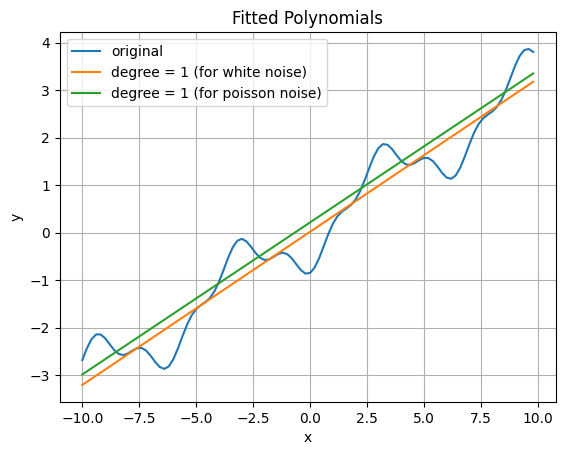

MSE of original + white noise (degree = 1):  0.31635078718107
MSE of original + poisson noise (degree = 1):  0.33163823589152724


In [107]:
plt.title('Fitted Polynomials')
plt.plot(x, y, label='original')
plt.plot(x, _w_[0](x), label='degree = 1 (for white noise)')
plt.plot(x, _p_[0](x), label='degree = 1 (for poisson noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print('MSE of original + white noise (degree = 1): ', MSE_w[0])
print('MSE of original + poisson noise (degree = 1): ', MSE_p[0])

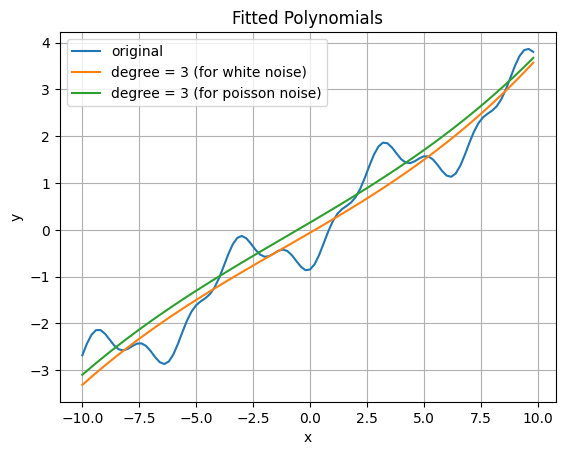

MSE of original + white noise (degree = 3):  0.33621921377542074
MSE of original + poisson noise (degree = 3):  0.3490534425779584


In [109]:
plt.title('Fitted Polynomials')
plt.plot(x, y, label='original')
plt.plot(x, _w_[2](x), label='degree = 3 (for white noise)')
plt.plot(x, _p_[2](x), label='degree = 3 (for poisson noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print('MSE of original + white noise (degree = 3): ', MSE_w[2])
print('MSE of original + poisson noise (degree = 3): ', MSE_p[2])

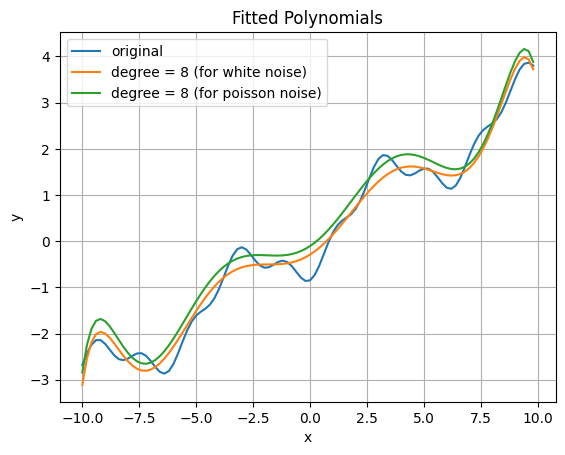

MSE of original + white noise (degree = 8):  0.07682262022241233
MSE of original + poisson noise (degree = 8):  0.13783303995538176


In [110]:
plt.title('Fitted Polynomials')
plt.plot(x, y, label='original')
plt.plot(x, _w_[7](x), label='degree = 8 (for white noise)')
plt.plot(x, _p_[7](x), label='degree = 8 (for poisson noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print('MSE of original + white noise (degree = 8): ', MSE_w[7])
print('MSE of original + poisson noise (degree = 8): ', MSE_p[7])

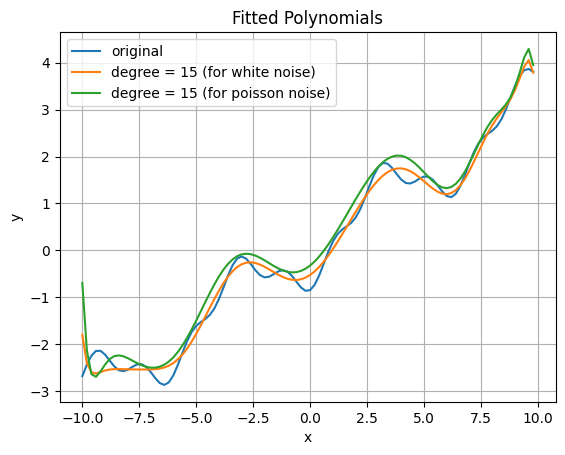

MSE of original + white noise (degree = 15):  0.06570895442311087
MSE of original + poisson noise (degree = 15):  0.19257639506941057


In [112]:
plt.title('Fitted Polynomials')
plt.plot(x, y, label='original')
plt.plot(x, _w_[14](x), label='degree = 15 (for white noise)')
plt.plot(x, _p_[14](x), label='degree = 15 (for poisson noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print('MSE of original + white noise (degree = 15): ', MSE_w[14])
print('MSE of original + poisson noise (degree = 15): ', MSE_p[14])

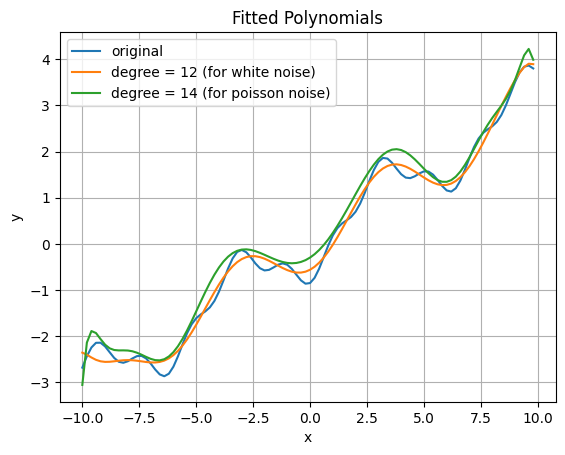

MSE of original + white noise (degree = 15):  0.04097235315532526
MSE of original + poisson noise (degree = 15):  0.08537620259165613


In [114]:
plt.title('Fitted Polynomials')
plt.plot(x, y, label='original')
plt.plot(x, _w_[11](x), label='degree = 12 (for white noise)')
plt.plot(x, _p_[13](x), label='degree = 14 (for poisson noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print('MSE of original + white noise (degree = 15): ', MSE_w[11])
print('MSE of original + poisson noise (degree = 15): ', MSE_p[13])

In [115]:
train_MSE_w = []
train_MSE_p = []
train_y = (df['y'])[mask]

for i in range(15):
    predicted_w = _w_[i](train_x)
    predicted_p = _p_[i](train_x)
    mse_ = sklearn.metrics.mean_squared_error(train_y, predicted_w)
    train_MSE_w.append(mse_)
    mse_ = sklearn.metrics.mean_squared_error(train_y, predicted_p)
    train_MSE_p.append(mse_)

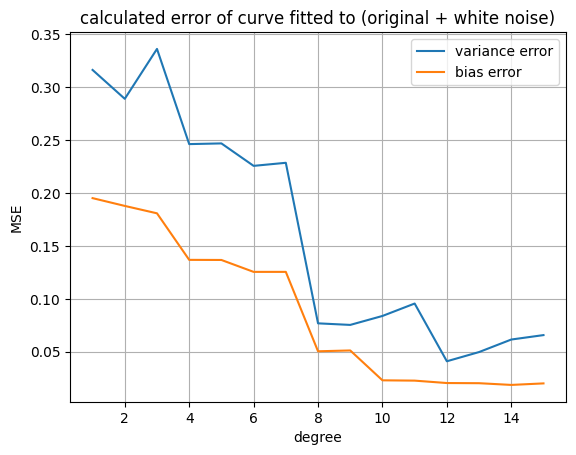

In [116]:
plt.title('calculated error of curve fitted to (original + white noise)')
plt.plot(range(1, 16), MSE_w, label='variance error')
plt.plot(range(1, 16), train_MSE_w, label='bias error')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

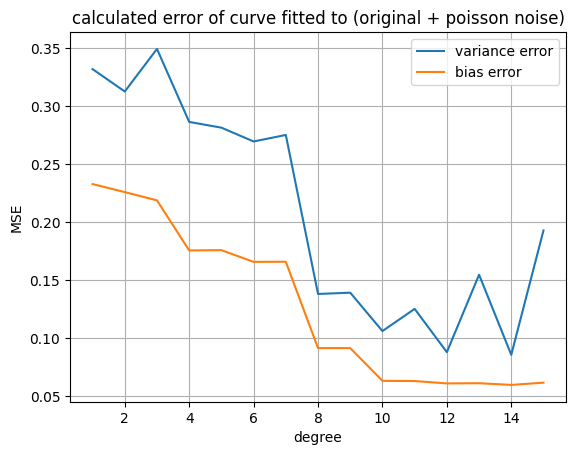

In [117]:
plt.title('calculated error of curve fitted to (original + poisson noise)')
plt.plot(range(1, 16), MSE_p, label='variance error')
plt.plot(range(1, 16), train_MSE_p, label='bias error')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()